DATA STEP
============
DATA step begin with word DATA and ends with the word DATALINES or CARDS;  
Immediate follow by actual data  
the name itself is the output name  
LENGTH: set how many bytes(length) use to store, default is 8 bytes; we must specific length when string is greater than 8, because it will cutoff the string; LENGTH stmt must go before INPUT stmt; INFORMAT stmt is an alternative approach of LENGTH stmt
```
INFORMAT GROUP $ 9.;         /* Separate INFORMAT statement */
INPUT GROUP OUTCOME $ COUNT; /* $ after GROUP optional */
or
INPUT GROUP : $9. OUTCOME $ COUNT;
```
LABEL: description of variable  

### INFORMAT: before INPUT stmt
6.1: say to read 6 columns and to place a decimal point before last digit  
MMDDYY8.: 10/21/50 or 10-21-50

format | result
-------|-------
MMDDYY6. | 102150
DATE7.   | 21OCT50
DATE9.   | 21 OCT1950
WORDDATE.| October 21, 1950

default the lowest year for 2 digit, 10/21/05 -> 10/21/2005
```
OPTIONS YEARCUTOFF=1990; 
```

### INPUT STMT

```
`#` signify multiple lines per subject.
INPUT #1 ID1 1-3 HR1 4-6
      #2 ID2 1-3 HR2 4-6
      #3 ID3 1-3 HR3 4-6
      #4 id4 1-3 HR4 4-6;
      
AVEHR=MEAN(OF HR1-HR4);      
```
### Logic Expression for derived variable
```
AGE=(ADMIT-DOB)/365;
IF CENTURY=18 THEN AGE=AGE+100;
        *EQUAL TO:;
AGE=(ADMIT-DOB)/365+100*(CENTURY=18);
```

PROC STEP
==============
NOPRINT: do not print result of this proc step  
NOOBS: No Observations ID
NWAY: NOT to include subtotal  
OUTPUT OUT=file MEAN=mu_name STD=std_name: create dataset  
ends with RUN; and run the preceding procedure(s) (only neccessary for Display Manager)

```
PROC PROCNAME options;
    STATEMENTS /statement options;
RUN;    
```

### KEYWORD
TITLE: across the top of output  
ID: as the first column  
VAR: var in our report

### MOST RECENT PER PATIENTS
``` 
PROC SORT DATA=PATIENTS;
    BY ID DATE;
RUN;

DATA RECENT;
    SET PATIENTS;
    BY ID;
    IF LAST.ID = 1; 
    *EQUAL TO: IF LAST.ID; ;
RUN;
```
COMMENT
=============
```
* comment ;
/* comment */
```



ARRAY
===================
```
DATA DIAG2;
    SET DIAG1;
    ARRAY D[*] DX1-DX3;
    DO I = 1 TO 3;
        DX=D[I];
        IF D[I] NE . THEN OUTPUT;
    END;
KEEP ID DX;
RUN;
```

In [1]:
DATA longheight;
INPUT subj $ height1 - height4;
ARRAY HEIGHT[4]HEIGHT1-HEIGHT4;
DO i=1 TO 4;
	HEIGHTM = 0.0254*height[i];
	OUTPUT;
END;
DROP i HEIGHT1-HEIGHT4;
datalines;
001 43.6 45.2 48.5 51.3
002 41.1 43.4 48.1 51.5
003 38.4 40.9 46.7 48.1
;
PROC print data=longheight;
RUN;


Obs,subj,HEIGHTM
1,001,1.10744
2,001,1.14808
3,001,1.23190
4,001,1.30302
5,002,1.04394
6,002,1.10236
7,002,1.22174
8,002,1.30810
9,003,0.97536
10,003,1.03886


READ DATA
================
@@:
holds the input record for the execution of the next INPUT statement across iterations of the DATA step. This line-hold specifier is called double trailing @. meaning same line containing mulitple data record

@:
holds an input record for the execution of the next INPUT statement within the same iteration of the DATA step. This line-hold specifier is called trailing @.

@n:
moves the pointer to column n.

VAR$: String

OBS: TOP X OBS

In [1]:
Data Parts;
input machine Deviation @@;
LABEL machine='car or plane' deviation='accident risk';
datalines;
1 -.0653 1 0.0141 1 -.0702 1 -.0734 1 -.0649 1 -.0601
2 -.0631 2 -.0148 2 -.0731 2 -.0764 2 -.0275 2 -.0497
1 -.0741 1 -.0673 1 -.0573 1 -.0629 1 -.0671 1 -.0246
2 -.0222 2 -.0807 2 -.0621 2 -.0785 2 -.0544 2 -.0511
1 -.0138 1 -.0609 1 0.0038 1 -.0758 1 -.0731 1 -.0455
;

proc sort data=Parts;
BY machine;
RUN;

PROC PRINT DATA=Parts (OBS=5);
ID machine;
run;

machine,Deviation
1,-0.0653
1,0.0141
1,-0.0702
1,-0.0734
1,-0.0649


In [2]:
PROC  FREQ DATA=Parts;
tables MACHINE*DEVIATION / NOCUM nopct norowpct ;
RUN;

PROC MEAN
==========
T: t testing the H_0: population mean is zero  
MAXDEC: round to 1 decimal place  
CLASS: SQL GROUP BY  
`_TYPE_`: `binary(_TYPE_)` correspond to CLASS v1 v2

binary | `_TYPE_` | Interpretation
-------|----------|-------
00 | 0 | mean over v1 and v2
01 | 1 | mean for each v1 
10 | 2 | mean for each v2
11 | 3 | mean for combination of v1 and v2


In [11]:
proc means data=Parts N MEAN STD STDERR CLM LCLM UCLM MIN MAX SUM VAR CV SKEWNESS KURTOSIS T PRT MAXDEC=1 noprint nway; 
class machine;
var deviation;
output out=mac_mean mean=m_dev;
run;

proc print data=mac_mean;
run;

Obs,machine,_TYPE_,_FREQ_,m_dev
1,1,1,18,-0.052133
2,2,1,12,-0.054467



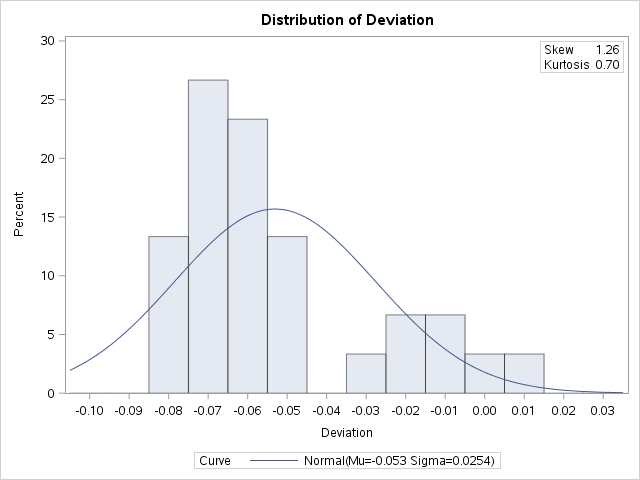

In [14]:
proc univariate data= Parts noprint NORMAL PLOT;
title "Histogram";
Histogram Deviation /normal midpoints=-0.10 to 0.03 by 0.01;
inset skewness = "Skew" (4.2)
	Kurtosis= "Kurtosis" (4.2)/
		Pos=NE
		Height=4;
run;

EXCEL IMPORT
==============

In [1]:
DATA inclass;
proc Import out=work.testfile datafile="/folders/myfolders/SAS-Programming/HW_1/dataexample.xls" DBMS=xls replace;
sheet="Data";
Getnames=yes;
proc print;
title "import Excel";
run;

Obs,ID,Time
1,A204,15.2
2,C305,17.8
3,M315,16.4
4,J228,14.21


In [52]:

DATA program_1_;
/* 
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.1
Date: September 4th, 2014
SAS303 - FALL 2014

----INITIAL VARIABLES---------------------------
SUBJ 	 -> Subject Number			(Character)
HEIGHT	 -> Height in inches		(Numeric)
WT_INIT	 -> Initial weight in lbs	(Numeric)
WT_FINAL -> Final weight			(Numeric)
------------------------------------------------
*/
LENGTH GENDER $ 1;                                              * using 1 bytes to store instead of default 8 bytes;
input SUBJ$ 1-3 HEIGHT 4-5 WT_INIT 6-8 WT_FINAL 9-11 GENDER$ 12;/*create input variables*/

/*
----CALCULATIONS---------------------------------
BMI_INIT = WT_INIT/((HEIGHT)^2)(BMI stands for body mass index)
BMI_FINAL = WT_FINAL/((HEIGHT)^2)
BMI_DIFF = (BMI_FINAL - BMI_INIT)
WT_kg = (WT_INIT/2.2)
HEIGHT_m = 0.0254×(HEIGHT_in)   
--------------------------------------------------
*/

WT_INIT_kg = (WT_INIT/2.2);
WT_FINAL_kg = (WT_FINAL/2.2);
HEIGHT_m = 0.0254*(HEIGHT);
BMI_INIT = WT_INIT_kg/((HEIGHT_m)**2);/*BMI_INIT in kg/m*/
BMI_FINAL = WT_FINAL_kg/((HEIGHT_m)**2);
BMI_DIFF = BMI_FINAL-BMI_INIT;

drop WT_INIT WT_FINAL WT_INIT_kg WT_FINAL_kg HEIGHT_m ;/*drop convertions output*/

/*DATA INPUT*/
Datalines;
00768155150F
00272250240F
00563240200M
00170345298M
;

proc sort;
by SUBJ;*SORT by SUBJ variable;
title "Body Mass Index Calculation";

proc print noobs; *No Observations ID ;

Run;

SUBJ,HEIGHT,GENDER,BMI_INIT,BMI_FINAL,BMI_DIFF
001,70,M,49.6059,42.8480,-6.75790
002,72,F,33.9770,32.6179,-1.35908
005,63,M,42.6030,35.5025,-7.10050
007,68,F,23.6169,22.8551,-0.76184


In [56]:
PROC MEANS DATA=program_1_ NWAY NOPRINT;
CLASS GENDER;
ID HEIGHT;
VAR BMI_FINAL BMI_DIFF;
OUTPUT OUT=BMI_M MEAN=MU_FINAL MU_DIFF;
RUN;

PROC PRINT DATA=BMI_M;
RUN;

Obs,GENDER,HEIGHT,_TYPE_,_FREQ_,MU_FINAL,MU_DIFF
1,F,72,1,2,27.7365,-1.06046
2,M,70,1,2,39.1752,-6.92920


In [9]:
DATA program_1_2a;
/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(a)
Date: September 4th, 2014
SAS303 - FALL 2014
----FILE INFO-----------
FILE: MilitaryService.txt
DATA ORDER: Last Name/First Name/Sex/Military Branch/Years of Service
------------------------
*/
infile "/folders/myfolders/SAS-Programming/HW_1/militaryservice.txt" dlm='/';*Open and external file militaryservice.txt;
input LAST_NAME$ FIRST_NAME$ GENDER$ MILITARY_BRANCH$ YEARS_IN_SERVICE;*input variables;
proc print DATA=program_1_2a(OBS=5);*print all the data from the external file;
title "Military Service List";
run;

Obs,LAST_NAME,FIRST_NAME,GENDER,MILITARY_BRANCH,YEARS_IN_SERVICE
1,Cavanaug,Peter,M,Marines,7.4
2,Geddy,Gerald,M,Army,10.3
3,Roseland,Megan,F,Army,5.1
4,Smith,Eileen,F,Air Forc,6.2
5,Peterson,Thomas,M,Navy,13.7


PROC PRINT
================

In [29]:
DATA problem_1_2b;
/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(b)
Date: September 4th, 2014
SAS303 - FALL 2014
----FILE INFO-----------
FILE: MilitaryService.txt
DATA ORDER: Last Name/First Name/Sex/Military Branch/Years of Service
------------------------
*/
infile "/folders/myfolders/SAS-Programming/HW_1/militaryservice.txt" dlm='/';
input LAST_NAME$ FIRST_NAME$ GENDER$ MILITARY_BRANCH$ YEARS_IN_SERVICE;

proc sort data=problem_1_2b;
by MILITARY_BRANCH;*Sort the data by the military branch;

proc print data=problem_1_2b;
title "Military Service List";
var LAST_NAME GENDER YEARS_IN_SERVICE;*Print the data with the last name , gender and years served;
ID MILITARY_BRANCH;*military branch as the identifier;
by MILITARY_BRANCH;*print by military branch;
sum YEARS_IN_SERVICE;*Sum the years of service for each department;
WHERE MILITARY_BRANCH NE 'Army' AND MILITARY_BRANCH NE 'Marines';
run;

In [18]:
DATA problem_1_2c;
/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(c)
Date: September 4th, 2014
SAS303 - FALL 2014
----FILE INFO-----------
FILE: MilitaryService.txt
DATA ORDER: Last Name/First Name/Sex/Military Branch/Years of Service
------------------------
*/
infile "/folders/myfolders/SAS-Programming/HW_1/militaryservice.txt" dlm='/';
input LAST_NAME$ FIRST_NAME$ GENDER$ MILITARY_BRANCH$ YEARS_IN_SERVICE;
proc sort data=problem_1_2c;
by MILITARY_BRANCH;*Sort the data by the military branch;
proc print data=problem_1_2c;
title "Military Service List by Branch of Service";
var LAST_NAME GENDER YEARS_IN_SERVICE;*Print the data with the last name , gender and years served;
ID MILITARY_BRANCH;*military branch as the identifier;
by MILITARY_BRANCH;*print by military branch;
proc means;
var YEARS_IN_SERVICE;*Find the average number of years served for each military branch;
run;

In [20]:
DATA problem_1_2d_i;
/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(d)_i
Date: September 4th, 2014
SAS303 - FALL 2014
----FILE INFO-----------
FILE: MilitaryService.txt
DATA ORDER: Last Name/First Name/Sex/Military Branch/Years of Service
------------------------
*/
infile "/folders/myfolders/SAS-Programming/HW_1/militaryservice.txt" dlm='/';
input LAST_NAME$ FIRST_NAME$ GENDER$ MILITARY_BRANCH$ YEARS_IN_SERVICE;*create input variables;
proc sort data=problem_1_2d_i;
by MILITARY_BRANCH;*Sort the data by the military branch;
proc print data=problem_1_2d_i;
where YEARS_IN_SERVICE>=10 ;*select observations that meet the condition specified;
title "Military Service List";
var LAST_NAME GENDER YEARS_IN_SERVICE;*Print the data with the last name , gender and years served;
ID MILITARY_BRANCH;*military branch as the identifier;
run;

MILITARY_BRANCH,LAST_NAME,GENDER,YEARS_IN_SERVICE
Air Forc,Ramble,M,15.0
Air Forc,Fobby,M,11.2
Army,Geddy,M,10.3
Army,Patel,M,14.7
Army,Early,M,14.1
Marines,Lovelace,M,20.1
Navy,Peterson,M,13.7
Navy,Li,M,10.8
Navy,Comisson,F,11.6


In [14]:
DATA problem_1_2d_ii;
/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(d)_i
Date: September 4th, 2014
SAS303 - FALL 2014
----FILE INFO-----------
FILE: MilitaryService.txt
DATA ORDER: Last Name/First Name/Sex/Military Branch/Years of Service
------------------------
*/
infile "/folders/myfolders/SAS-Programming/HW_1/militaryservice.txt" dlm='/';
input LAST_NAME$ FIRST_NAME$ GENDER$ MILITARY_BRANCH$ YEARS_IN_SERVICE;*create input variables;

proc sort data=problem_1_2d_ii;
by MILITARY_BRANCH;*Sort the data by the military branch;

proc print data=problem_1_2d_ii;
where YEARS_IN_SERVICE >=5 and YEARS_IN_SERVICE<10;*select observations that meet the condition specified >=5 & <10;
title "Military Service List";
var LAST_NAME GENDER YEARS_IN_SERVICE;*Print the data with the last name , gender and years served;
ID MILITARY_BRANCH;*military branch as the identifier;

run;

MILITARY_BRANCH,LAST_NAME,GENDER,YEARS_IN_SERVICE
Air Forc,Smith,F,6.2
Air Forc,Hicks,F,8.3
Air Forc,Smith,M,9.5
Army,Roseland,F,5.1
Army,Canter,F,5.0
Marines,Cavanaug,M,7.4
Marines,Johnson,M,8.6
Marines,Welch,F,9.6
Marines,Johnson,M,5.8
Navy,Rinaldi,M,5.4


In [21]:
DATA Problem_1_2_d_iii;

/*
----ASSIGMENT_1---------
Author: Jose L Rodriguez
Assigment: 1
Probleml:  1.2(d)_iii
Date: September 4th, 2014
SAS303 - FALL 2014
---- SET FILE INFO-----------
FILE: problem_1_2c.sas
DATA ORDER: LAST_NAME GENDER YEARS_IN_SERVICE
------------------------
*/
set PROBLEM_1_2C;*read rows and columns from problem_1_2C table;
if MILITARY_BRANCH="Marines";*Only those rows whose value of MILITARY_BRANCH is Marines are output to the new table ;
proc print;
TITLE "MILITARY SERVICE MARINES LIST";
run;

Obs,LAST_NAME,FIRST_NAME,GENDER,MILITARY_BRANCH,YEARS_IN_SERVICE
1,Cavanaug,Peter,M,Marines,7.4
2,Johnson,James,M,Marines,8.6
3,Lovelace,Henry,M,Marines,20.1
4,Parks,Tu,F,Marines,4.9
5,Welch,Amber,F,Marines,9.6
6,Johnson,Tracy,M,Marines,5.8
